## Before you start

In [4]:
# Import the os module for interacting with the operating system
import os
# Import userdata from google.colab to access Colab secrets
from google.colab import userdata

# Set the ROBOFLOW_API_KEY environment variable using a secret stored in Colab
os.environ["ROBOFLOW_API_KEY"] = userdata.get("ROBOFLOW_API_KEY")

In [5]:
# Execute the nvidia-smi command to display NVIDIA GPU information
!nvidia-smi

Wed Nov 26 01:10:53 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [6]:
# Install the roboflow library silently using pip
!pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 90.9 MB/s eta 0:00:00


In [7]:
# Install gdown and inference-gpu libraries silently using pip
!pip install -q gdown inference-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 8.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 68.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.1/190.1 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 6.0 M

In [9]:
# Download video files from Google Drive using gdown
# These videos will be used to test the workflow
!gdown -O "0bfacc_0.mp4" "https://drive.google.com/uc?id=12TqauVZ9tLAv8kWxTTBFWtgt2hNQ4_ZF"
!gdown -O "2e57b9_0.mp4" "https://drive.google.com/uc?id=19PGw55V8aA6GZu5-Aac5_9mCy3fNxnEf"
!gdown -O "08fd33_0.mp4" "https://drive.google.com/uc?id=1OG8K6wqUw9t7lp9ms1M48DxRhwTYciK-"
!gdown -O "573e61_0.mp4" "https://drive.google.com/uc?id=1yYPKuXbHsCxqjA9G-S6aeR2Kcnos8RPU"
!gdown -O "121364_0.mp4" "https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu"

Downloading...
From: https://drive.google.com/uc?id=12TqauVZ9tLAv8kWxTTBFWtgt2hNQ4_ZF
To: /content/0bfacc_0.mp4
100% 19.9M/19.9M [00:00<00:00, 21.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=19PGw55V8aA6GZu5-Aac5_9mCy3fNxmEf
To: /content/2e57b9_0.mp4
100% 21.1M/21.1M [00:01<00:00, 15.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OG8K6wqUw9t7lp9ms1M48DxRhwTYciK-
To: /content/08fd33_0.mp4
100% 19.9M/19.9M [00:01<00:00, 17.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1yYPKuXbHsCxqjA9G-S6aeR2Kcnos8RPU
To: /content/573e61_0.mp4
100% 18.9M/18.9M [00:01<00:00, 12.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu
To: /content/121364_0.mp4
100% 17.2M/17.2M [00:00<00:00, 32.7MB/s]


In [10]:
# Import the os module
import os
# Set the ONNXRUNTIME_EXECUTION_PROVIDERS environment variable to use CUDA
# This ensures that ONNX Runtime will use the GPU for acceleration if available
os.environ["ONNXRUNTIME_EXECUTION_PROVIDERS"] = "[CUDAExecutionProvider]"

## ball, player, goalkeeper and referee detection

In [11]:
# Install a specific version of cachetools to resolve potential dependency conflicts
!pip install cachetools==4.2.2
# Import get_model function from the inference library
from inference import get_model
# Import userdata from google.colab to access Colab secrets
from google.colab import userdata

# Retrieve the Roboflow API key from Colab user data
ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
# Define the model ID for player detection
PLAYER_DETECTION_MODEL_ID = "football-players-detection-3zvbc/12"
# Initialize the player detection model using the Roboflow API
PLAYER_DETECTION_MODEL = get_model(model_id=PLAYER_DETECTION_MODEL_ID, api_key=ROBOFLOW_API_KEY)

  Attempting uninstall: cachetools
    Found existing installation: cachetools 5.5.2
    Uninstalling cachetools-5.5.2:
      Successfully uninstalled cachetools-5.5.2


ModelDependencyMissing: Your `inference` configuration does not support SAM model. Use pip install 'inference[sam]' to install missing requirements.To suppress this warning, set CORE_MODEL_SAM_ENABLED to False.
ModelDependencyMissing: Your `inference` configuration does not support SAM2 model. Use pip install 'inference[sam]' to install missing requirements.To suppress this warning, set CORE_MODEL_SAM2_ENABLED to False.
ModelDependencyMissing: Your `inference` configuration does not support SAM3 model. Install SAM3 dependencies and set CORE_MODEL_SAM3_ENABLED to True.
ModelDependencyMissing: Your `inference` configuration does not support Gaze Detection model. Use pip install 'inference[gaze]' to install missing requirements.To suppress this warning, set CORE_MODEL_GAZE_ENABLED to False.
ModelDependencyMissing: Your `inference` configuration does not support GroundingDINO model. Use pip install 'inference[grounding-dino]' to install missing requirements.To suppress this warning, set CO

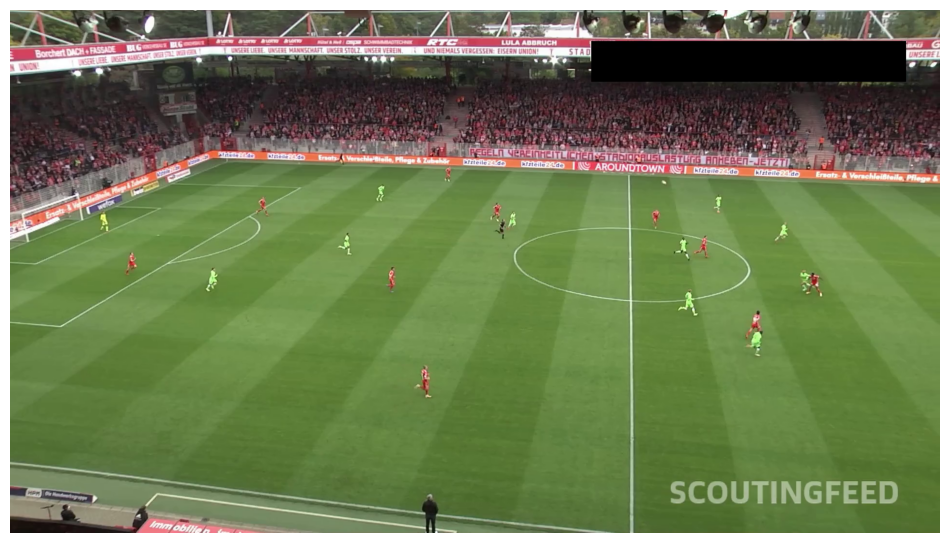

In [12]:
# Import the supervision library for computer vision tasks
import supervision as sv

# Define the path to the source video file
SOURCE_VIDEO_PATH = "/content/121364_0.mp4"

# Create a frame generator to extract frames from the video
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
# Get the first frame from the generator
frame = next(frame_generator)

# Plot the extracted frame using supervision's utility function
sv.plot_image(frame)

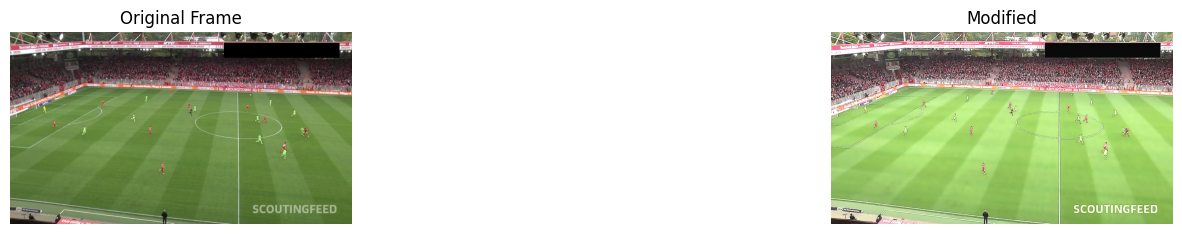

In [17]:
# Import OpenCV for image processing
import cv2
# Import NumPy for numerical operations
import numpy as np
# Import Matplotlib for plotting images
import matplotlib.pyplot as plt

# 1. Enhance Contrast and Brightness
# Alpha controls contrast (1.0-3.0), beta controls brightness (0-100)
alpha = 1.5
beta = 10
# Apply contrast and brightness adjustments using cv2.convertScaleAbs
contrasted_frame = cv2.convertScaleAbs(frame, alpha=alpha, beta=beta)

# 2. Sharpen the image
# Define a sharpening kernel (a matrix that determines the effect of the filter)
sharpening_kernel = np.array([
    [-1, -1, -1],
    [-1,  9, -1],
    [-1, -1, -1]
])
# Apply the sharpening filter using cv2.filter2D
sharpened_frame = cv2.filter2D(contrasted_frame, -1, sharpening_kernel)

# 3. Reduce Noise (using Non-local Means Denoising)
# h: filter strength (higher removes more noise, may blur details)
# hColor: same as h but for color components
# templateWindowSize: size of the template patch (must be odd)
# searchWindowSize: size of the window for weighted average (must be odd)
denoised_frame = cv2.fastNlMeansDenoisingColored(
    sharpened_frame, None, h=10, hColor=10, templateWindowSize=7, searchWindowSize=21)

# Display the original and transformed images side-by-side
plt.figure(figsize=(15, 5))

# Plot the Original Frame
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) # Convert BGR to RGB for matplotlib
plt.title('Original Frame')
plt.axis('off') # Hide axes

# Plot the Modified (Contrast Enhanced, Sharpened, Denoised) Frame
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(denoised_frame, cv2.COLOR_BGR2RGB)) # Convert BGR to RGB for matplotlib
plt.title('Modified')
plt.axis('off') # Hide axes

plt.show()

In [18]:
# Import tqdm for displaying progress bars
from tqdm import tqdm
# Import the supervision library for computer vision tasks
import supervision as sv

# Define the path to the source video file
SOURCE_VIDEO_PATH = "/content/2e57b9_0.mp4"
# Define the path where the processed video will be saved
TARGET_VIDEO_PATH = "/content/testb_result.mp4"

# Initialize a BoxAnnotator for drawing bounding boxes
# Colors are defined using hex codes for a specific color palette
box_annotator = sv.BoxAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
# Initialize a LabelAnnotator for adding labels to bounding boxes
# Colors are defined using hex codes for a specific color palette and text color
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000')
)

# Get video information (e.g., frame rate, resolution) from the source video path
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
# Initialize a VideoSink to write annotated frames to a new video file
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info=video_info)
# Create a frame generator to extract frames from the source video
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

# Process each frame in the video
with video_sink:
  # Iterate through frames, showing a progress bar with tqdm
  for frame in tqdm(frame_generator, total = video_info.total_frames):

    # Get the next frame from the generator
    # Note: 'frame' in the loop is assigned the iterator, then next(frame_generator) gets the actual frame.
    # This specific line `frame = next(frame_generator)` might cause frames to be skipped
    # if `frame` was already assigned the frame by the `for` loop. It should typically be:
    # `for frame in tqdm(frame_generator, total = video_info.total_frames):`
    # followed directly by detection logic.
    frame = next(frame_generator)

    # Perform inference using the PLAYER_DETECTION_MODEL
    # confidence=0.3 filters detections below this threshold
    result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
    # Convert inference results to Supervision Detections format
    detections = sv.Detections.from_inference(result)

    # Prepare labels for annotation, including class name and confidence score
    labels = [
        f"{class_name} {confidence:.2f}"
        for class_name, confidence
        in zip(detections['class_name'], detections.confidence)
    ]

    # Create a copy of the original frame for annotation
    annotated_frame = frame.copy()
    # Annotate the frame with bounding boxes
    annotated_frame = box_annotator.annotate(
        scene=annotated_frame,
        detections=detections)
    # Annotate the frame with labels
    annotated_frame = label_annotator.annotate(
        scene=annotated_frame,
        detections=detections,
        labels=labels)
    # Write the annotated frame to the video sink
    video_sink.write_frame(annotated_frame)

# The commented line below would plot the last annotated frame if uncommented
#sv.plot_image(annotated_frame)

 50%|█████     | 375/750 [02:01<02:01,  3.10it/s]


## video game style visualization

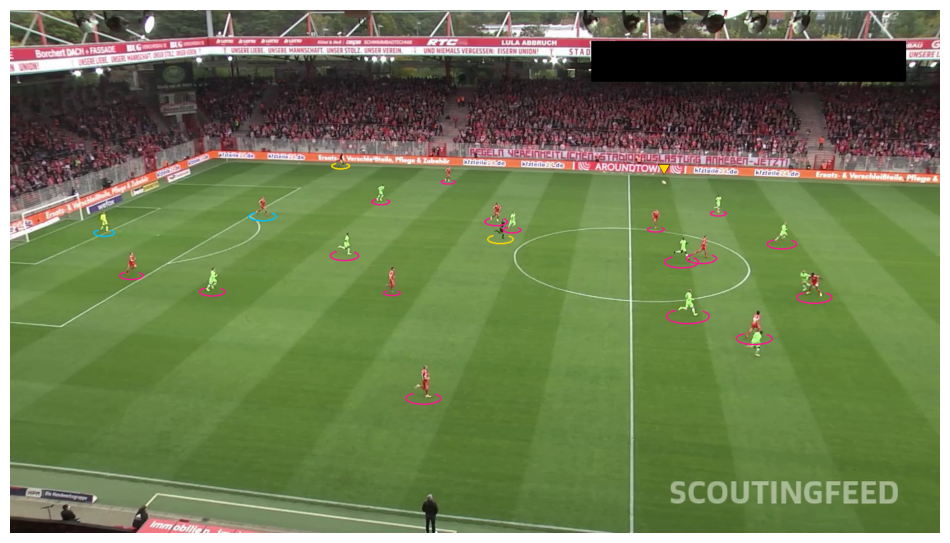

In [ ]:
# Import the supervision library for computer vision tasks
import supervision as sv

# Define the path to the source video file
SOURCE_VIDEO_PATH = "/content/121364_0.mp4"
# Define the class ID for the ball (assuming 0 is the ball class)
BALL_ID = 0

# Initialize an EllipseAnnotator for drawing ellipses (e.g., for players/goalkeepers/referees)
# Colors are defined using hex codes for a specific color palette
ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)

# Initialize a TriangleAnnotator for drawing triangles (e.g., for the ball)
# Color and dimensions (base, height) are specified
triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex('#FFD700'),
    base=25,
    height=21,
    outline_thickness=1
)

# Create a frame generator to extract frames from the video
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

# Get the first frame from the generator
frame = next(frame_generator)

# Perform inference using the PLAYER_DETECTION_MODEL
# confidence=0.3 filters detections below this threshold
result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
# Convert inference results to Supervision Detections format
detections = sv.Detections.from_inference(result)

# Filter detections to get only the ball
ball_detections = detections[detections.class_id == BALL_ID]
# Pad the bounding boxes of the ball detections by 10 pixels
ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

# Filter detections to get all objects *except* the ball
all_detections = detections[detections.class_id != BALL_ID]
# Apply Non-Maximum Suppression (NMS) to remove overlapping bounding boxes
# threshold=0.5 and class_agnostic=True means NMS is applied regardless of class
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
# Decrement class IDs for the remaining detections (e.g., if ball was class 0, now classes start from 0)
all_detections.class_id -= 1

# Create a copy of the original frame for annotation
annotated_frame = frame.copy()
# Annotate the frame with ellipses for players, goalkeepers, referees
annotated_frame = ellipse_annotator.annotate(
    scene=annotated_frame,
    detections=all_detections)
# Annotate the frame with triangles for the ball
annotated_frame = triangle_annotator.annotate(
    scene=annotated_frame,
    detections=ball_detections)

# Plot the annotated frame
sv.plot_image(annotated_frame)

For video

In [ ]:
# Import the supervision library for computer vision tasks
import supervision as sv
# Import tqdm for displaying progress bars
from tqdm import tqdm

# Define the path to the source video file
SOURCE_VIDEO_PATH = "/content/121364_0.mp4"
# Define the path where the processed video will be saved
TARGET_VIDEO_PATH = "/content/new_annotations_result.mp4"
# Define the class ID for the ball (assuming 0 is the ball class)
BALL_ID = 0

# Initialize an EllipseAnnotator for drawing ellipses
# Colors are defined using hex codes for a specific color palette
ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)

# Initialize a TriangleAnnotator for drawing triangles
# Color and dimensions (base, height) are specified
triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex('#FFD700'),
    base=25,
    height=21,
    outline_thickness=1
)

# Get video information (e.g., frame rate, resolution) from the source video path
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
# Initialize a VideoSink to write annotated frames to a new video file
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info=video_info)
# Create a frame generator to extract frames from the source video
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

# Process each frame in the video
with video_sink:
    # Iterate through frames, showing a progress bar with tqdm
    for frame in tqdm(frame_generator, total=video_info.total_frames):
        # Perform inference using the PLAYER_DETECTION_MODEL
        # confidence=0.3 filters detections below this threshold
        result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
        # Convert inference results to Supervision Detections format
        detections = sv.Detections.from_inference(result)

        # Filter detections to get only the ball
        ball_detections = detections[detections.class_id == BALL_ID]
        # Pad the bounding boxes of the ball detections by 10 pixels
        ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

        # Filter detections to get all objects *except* the ball
        all_detections = detections[detections.class_id != BALL_ID]
        # Apply Non-Maximum Suppression (NMS) to remove overlapping bounding boxes
        # threshold=0.5 and class_agnostic=True means NMS is applied regardless of class
        all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
        # Decrement class IDs for the remaining detections (e.g., if ball was class 0, now classes start from 0)
        all_detections.class_id -= 1

        # Create a copy of the original frame for annotation
        annotated_frame = frame.copy()
        # Annotate the frame with ellipses for players, goalkeepers, referees
        annotated_frame = ellipse_annotator.annotate(
            scene=annotated_frame,
            detections=all_detections)
        # Annotate the frame with triangles for the ball
        annotated_frame = triangle_annotator.annotate(
            scene=annotated_frame,
            detections=ball_detections)

        # Write the annotated frame to the video sink
        video_sink.write_frame(annotated_frame)

100%|██████████| 750/750 [03:49<00:00,  3.27it/s]


## player tracking

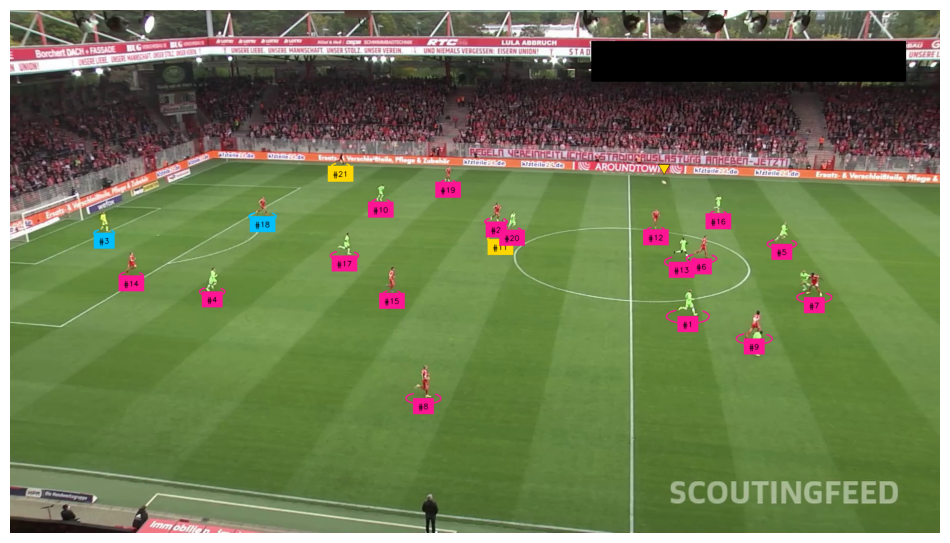

In [19]:
# Import the supervision library for computer vision tasks
import supervision as sv

# Define the path to the source video file
SOURCE_VIDEO_PATH = "/content/121364_0.mp4"
# Define the class ID for the ball (assuming 0 is the ball class)
BALL_ID = 0

# Initialize an EllipseAnnotator for drawing ellipses around tracked objects
ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
# Initialize a LabelAnnotator for adding tracker IDs to objects
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000'),
    text_position=sv.Position.BOTTOM_CENTER
)
# Initialize a TriangleAnnotator for drawing triangles (e.g., for the ball)
triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex('#FFD700'),
    base=25,
    height=21,
    outline_thickness=1
)

# Initialize a ByteTrack tracker for object tracking
tracker = sv.ByteTrack()
# Reset the tracker's state (important for consistent tracking across runs)
tracker.reset()

# Create a frame generator to extract frames from the video
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
# Get the first frame for initial processing
frame = next(frame_generator)

# Perform inference using the PLAYER_DETECTION_MODEL with a confidence threshold
result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
# Convert inference results to Supervision Detections format
detections = sv.Detections.from_inference(result)

# Filter detections to get only the ball
ball_detections = detections[detections.class_id == BALL_ID]
# Pad the bounding boxes of the ball detections by 10 pixels
ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

# Filter detections to get all objects *except* the ball
all_detections = detections[detections.class_id != BALL_ID]
# Apply Non-Maximum Suppression (NMS) to remove overlapping bounding boxes
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
# Decrement class IDs for the remaining detections (adjusting for ball being ID 0)
all_detections.class_id -= 1
# Update the tracker with the processed detections to assign unique IDs to objects
all_detections = tracker.update_with_detections(detections=all_detections)

# Create labels for annotation using the assigned tracker IDs
labels = [
    f"#{tracker_id}"
    for tracker_id
    in all_detections.tracker_id
]

# Create a copy of the original frame for annotation
annotated_frame = frame.copy()
# Annotate the frame with ellipses for the tracked objects
annotated_frame = ellipse_annotator.annotate(
    scene=annotated_frame,
    detections=all_detections)
# Annotate the frame with labels (tracker IDs)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame,
    detections=all_detections,
    labels=labels)
# Annotate the frame with triangles for the ball
annotated_frame = triangle_annotator.annotate(
    scene=annotated_frame,
    detections=ball_detections)

# Plot the final annotated frame
sv.plot_image(annotated_frame)

In [20]:
# Import tqdm for displaying progress bars
from tqdm import tqdm
# Import the supervision library for computer vision tasks
import supervision as sv

# Define the path to the source video file
SOURCE_VIDEO_PATH = "/content/121364_0.mp4"
# Define the class ID for players (assuming 2 is the player class)
PLAYER_ID = 2
# Define the stride, meaning frames will be processed every STRIDE frames
STRIDE = 30

# Create a frame generator to extract frames from the video with a specified stride
frame_generator = sv.get_video_frames_generator(
    source_path=SOURCE_VIDEO_PATH, stride=STRIDE)

# Initialize an empty list to store player crops
crops = []
# Iterate through the frames generated by the frame_generator
for frame in tqdm(frame_generator, desc='collecting crops'):
    # Perform inference using the PLAYER_DETECTION_MODEL with a confidence threshold
    result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
    # Convert inference results to Supervision Detections format
    detections = sv.Detections.from_inference(result)
    # Apply Non-Maximum Suppression (NMS) to remove overlapping bounding boxes
    detections = detections.with_nms(threshold=0.5, class_agnostic=True)
    # Filter detections to get only players
    detections = detections[detections.class_id == PLAYER_ID]
    # Crop the image for each detected player
    players_crops = [sv.crop_image(frame, xyxy) for xyxy in detections.xyxy]
    # Add the extracted player crops to the 'crops' list
    crops += players_crops

collecting crops: 25it [00:13,  1.82it/s]


**Note:** Here's a sample (100 elements) of the crops we've gathered.

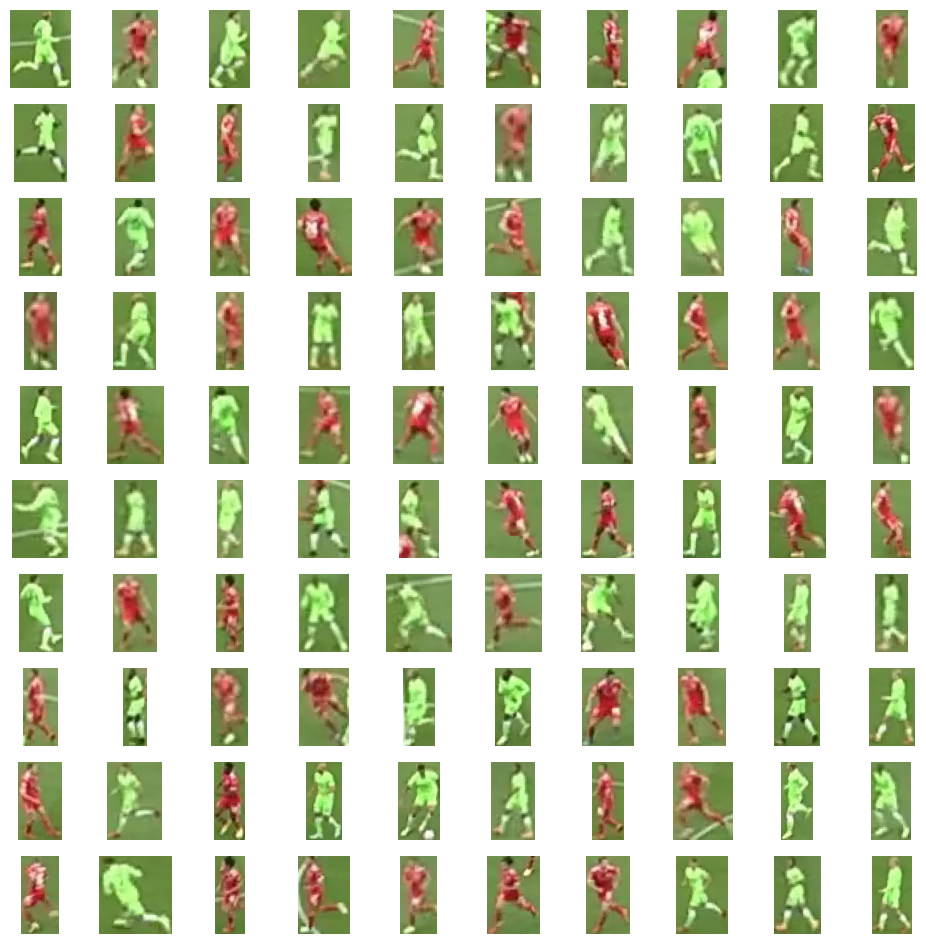

In [21]:
# Plot a grid of the first 100 collected player crops
# The grid will have 10 rows and 10 columns
sv.plot_images_grid(crops[:100], grid_size=(10, 10))

**Note:** Next, we'll run CLIP to calculate embeddings for each of the crops.

In [22]:
# Import torch for tensor operations and GPU acceleration
import torch
# Import CLIPProcessor and CLIPVisionModel from the transformers library
from transformers import CLIPProcessor, CLIPVisionModel

# Define the path/name for the pre-trained CLIP model
CLIP_MODEL_PATH = 'openai/clip-vit-base-patch32'

# Determine the device to use for computation (GPU if available, otherwise CPU)
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
# Load the pre-trained CLIP vision model and move it to the determined device
EMBEDDINGS_MODEL = CLIPVisionModel.from_pretrained(CLIP_MODEL_PATH).to(DEVICE)
# Load the pre-trained CLIP processor (tokenizer and image preprocessor)
EMBEDDINGS_PROCESSOR = CLIPProcessor.from_pretrained(CLIP_MODEL_PATH)

The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [23]:
# Import NumPy for numerical operations
import numpy as np
# Import chunked from more_itertools for batch processing
from more_itertools import chunked

# Define the batch size for processing crops
BATCH_SIZE = 32

# Convert OpenCV (NumPy array) image crops to Pillow image format, as required by CLIPProcessor
crops = [sv.cv2_to_pillow(crop) for crop in crops]
# Divide the crops into batches for efficient processing
batches = chunked(crops, BATCH_SIZE)
# Initialize an empty list to store embeddings
data = []
# Disable gradient calculations as we are only performing inference
with torch.no_grad():
    # Iterate through batches, displaying a progress bar
    for batch in tqdm(batches, desc='embedding extraction'):
        # Process the batch of images using CLIPProcessor and move to the device
        inputs = EMBEDDINGS_PROCESSOR(images=batch, return_tensors="pt").to(DEVICE)
        # Get embeddings from the CLIP vision model
        outputs = EMBEDDINGS_MODEL(**inputs)
        # Extract the last hidden state, average along the sequence dimension, and convert to NumPy array
        embeddings = torch.mean(outputs.last_hidden_state, dim=1).cpu().numpy()
        # Append the embeddings of the current batch to the data list
        data.append(embeddings)

# Concatenate all batch embeddings into a single NumPy array
data = np.concatenate(data)

embedding extraction: 15it [00:05,  2.59it/s]


**Note:** Using [UMAP](https://github.com/lmcinnes/umap), we project our embeddings from `(N, 768)` to `(N, 3)` and then perform a two-cluster division using [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

In [24]:
# Import UMAP for dimensionality reduction
import umap
# Import KMeans for clustering
from sklearn.cluster import KMeans

# Initialize UMAP reducer to project data to 3 dimensions
REDUCER = umap.UMAP(n_components=3)
# Initialize KMeans clustering model for 2 clusters
CLUSTERING_MODEL = KMeans(n_clusters=2)

In [25]:
# Apply UMAP to reduce the dimensionality of the CLIP embeddings
projections = REDUCER.fit_transform(data)
# Apply KMeans clustering to the UMAP projections to assign clusters
clusters = CLUSTERING_MODEL.fit_predict(projections)

Silhouette Score: 0.81
Davies-Bouldin Index (CLIP): 0.27
Calinski-Harabasz Index (CLIP): 5286.48


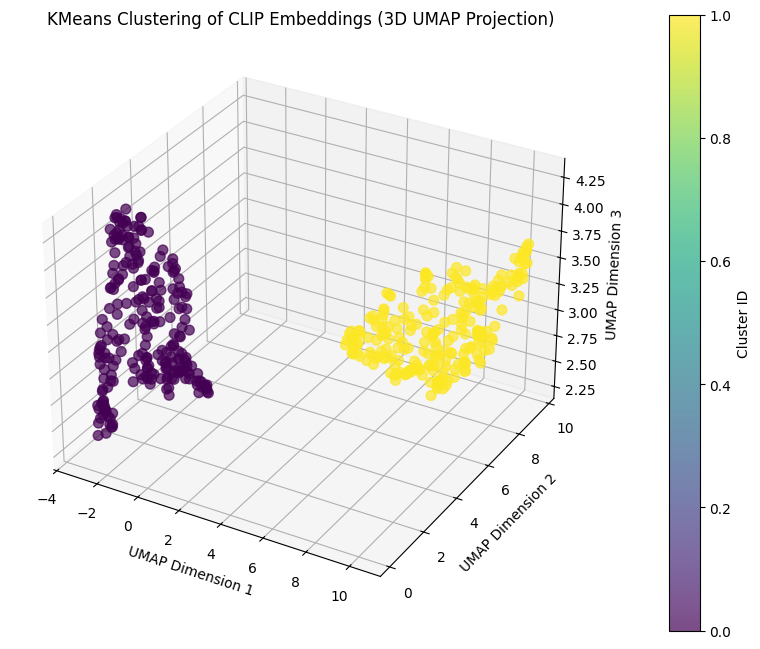

In [36]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt
# Import Axes3D for 3D plotting
from mpl_toolkits.mplot3d import Axes3D
# Import silhouette_score for evaluating clustering quality
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calculate Silhouette Score: measures how similar an object is to its own cluster compared to others
silhouette_avg = silhouette_score(projections, clusters)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Calculate Davies-Bouldin Index: measures the ratio of within-cluster scatter to between-cluster separation (lower is better)
davies_bouldin = davies_bouldin_score(projections, clusters)
print(f"Davies-Bouldin Index (CLIP): {davies_bouldin:.2f}")

# Calculate Calinski-Harabasz Index: measures the ratio of between-cluster to within-cluster dispersion (higher is better)
calinski_harabasz = calinski_harabasz_score(projections, clusters)
print(f"Calinski-Harabasz Index (CLIP): {calinski_harabasz:.2f}")


# Plotting the 3D clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a scatter plot of the UMAP projections, colored by cluster assignment
scatter = ax.scatter(
    projections[:, 0],
    projections[:, 1],
    projections[:, 2],
    c=clusters, # Color points based on their assigned cluster
    cmap='viridis', # Colormap to use for clusters
    s=50, # Marker size
    alpha=0.7 # Transparency of markers
)

# Add labels to the axes and a title to the plot
ax.set_xlabel('UMAP Dimension 1')
ax.set_ylabel('UMAP Dimension 2')
ax.set_zlabel('UMAP Dimension 3')
ax.set_title('KMeans Clustering of CLIP Embeddings (3D UMAP Projection)')

# Add a color bar to show the mapping of colors to cluster IDs
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Cluster ID')

# Display the plot
plt.show()

### Feature Extraction without CLIP

Let's extract a simple feature from each crop, such as the average RGB color, and use that for clustering to compare against the CLIP-based approach.

In [33]:
import numpy as np

# Initialize an empty list to store non-CLIP features
non_clip_features = []
# Iterate through each cropped image (assuming they are still OpenCV/NumPy arrays)
for crop in crops:
    # Calculate the mean RGB value for each crop by averaging pixel values across height and width
    mean_rgb = np.mean(crop, axis=(0, 1))
    non_clip_features.append(mean_rgb)

# Convert the list of mean RGB values into a single NumPy array
non_clip_features = np.array(non_clip_features)

# Print the shape of the resulting feature array
print(f"Shape of non-CLIP features: {non_clip_features.shape}")

Shape of non-CLIP features: (562, 3)


### Clustering with Non-CLIP Features

Now, let's apply UMAP and KMeans to these basic image features.

In [34]:
import umap
from sklearn.cluster import KMeans

# Apply UMAP dimensionality reduction to the non-CLIP features
# Uses the same REDUCER instance initialized previously for consistency
non_clip_projections = REDUCER.fit_transform(non_clip_features)
# Apply KMeans clustering to the UMAP projections of non-CLIP features
# Uses the same CLUSTERING_MODEL instance initialized previously for consistency
non_clip_clusters = CLUSTERING_MODEL.fit_predict(non_clip_projections)

# Indicate that clustering with non-CLIP features is complete
print("Clustering with non-CLIP features complete.")

Clustering with non-CLIP features complete.


### Metrics and Visualization for Non-CLIP Clusters

Let's calculate the same metrics and plot the 3D projection for the clusters formed using non-CLIP features.

Silhouette Score (non-CLIP): 0.83
Davies-Bouldin Index (non-CLIP): 0.69
Calinski-Harabasz Index (non-CLIP): 829.53


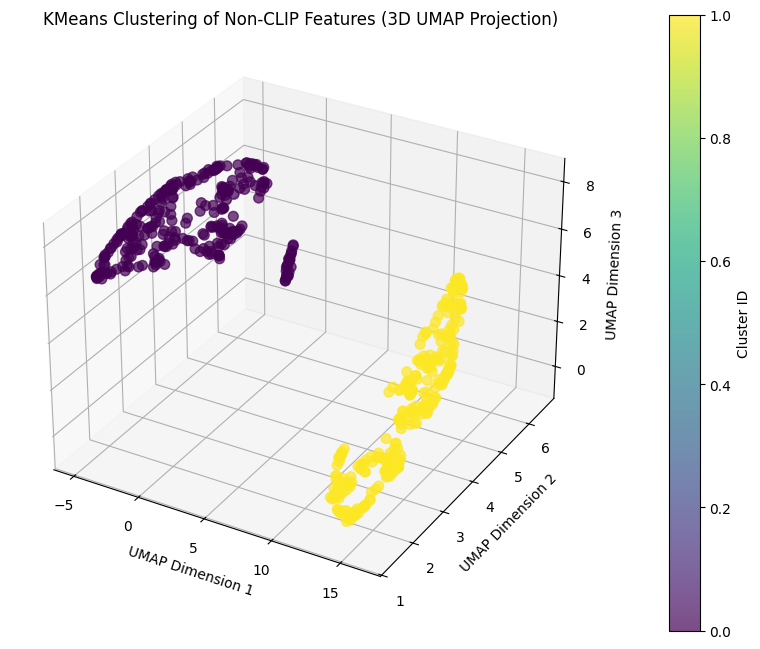

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calculate Silhouette Score for the clusters formed using non-CLIP features
silhouette_avg_non_clip = silhouette_score(non_clip_projections, non_clip_clusters)
print(f"Silhouette Score (non-CLIP): {silhouette_avg_non_clip:.2f}")

# Calculate Davies-Bouldin Index for the non-CLIP clusters
# Note: davies_bouldin_score expects original features, not projections, for accurate calculation
davies_bouldin_non_clip = davies_bouldin_score(non_clip_features, non_clip_clusters)
print(f"Davies-Bouldin Index (non-CLIP): {davies_bouldin_non_clip:.2f}")

# Calculate Calinski-Harabasz Index for the non-CLIP clusters
# Note: calinski_harabasz_score expects original features, not projections
calinski_harabasz_non_clip = calinski_harabasz_score(non_clip_features, non_clip_clusters)
print(f"Calinski-Harabasz Index (non-CLIP): {calinski_harabasz_non_clip:.2f}")

# Plotting the 3D clusters formed by non-CLIP features
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a scatter plot of the UMAP projections of non-CLIP features, colored by cluster assignment
scatter = ax.scatter(
    non_clip_projections[:, 0],
    non_clip_projections[:, 1],
    non_clip_projections[:, 2],
    c=non_clip_clusters, # Color points based on their assigned cluster
    cmap='viridis', # Colormap to use for clusters
    s=50, # Marker size
    alpha=0.7 # Transparency of markers
)

# Add labels to the axes and a title to the plot
ax.set_xlabel('UMAP Dimension 1')
ax.set_ylabel('UMAP Dimension 2')
ax.set_zlabel('UMAP Dimension 3')
ax.set_title('KMeans Clustering of Non-CLIP Features (3D UMAP Projection)')

# Add a color bar to show the mapping of colors to cluster IDs
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Cluster ID')

# Display the plot
plt.show()

In [32]:
# Import the supervision library for computer vision tasks
import supervision as sv
# Import tqdm for displaying progress bars
from tqdm import tqdm
# Import TeamClassifier from the sports.common.team module
from sports.common.team import TeamClassifier

# Define the path to the source video file
SOURCE_VIDEO_PATH = "/content/121364_0.mp4"
# Define the class ID for players (assuming 2 is the player class)
PLAYER_ID = 2
# Define the stride, meaning frames will be processed every STRIDE frames
STRIDE = 30

# Create a frame generator to extract frames from the video with a specified stride
frame_generator = sv.get_video_frames_generator(
    source_path=SOURCE_VIDEO_PATH, stride=STRIDE)

# Initialize an empty list to store player crops
crops = []
# Iterate through the frames generated by the frame_generator
for frame in tqdm(frame_generator, desc='collecting crops'):
    # Perform inference using the PLAYER_DETECTION_MODEL with a confidence threshold
    result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
    # Convert inference results to Supervision Detections format
    detections = sv.Detections.from_inference(result)
    # Filter detections to get only players (based on PLAYER_ID)
    players_detections = detections[detections.class_id == PLAYER_ID]
    # Crop the image for each detected player
    players_crops = [sv.crop_image(frame, xyxy) for xyxy in detections.xyxy]
    # Add the extracted player crops to the 'crops' list
    crops += players_crops

# Initialize the TeamClassifier, specifying 'cuda' for GPU acceleration if available
team_classifier = TeamClassifier(device="cuda")
# Fit the TeamClassifier using the collected player crops
# This step typically involves extracting features and clustering to learn team representations
team_classifier.fit(crops)

collecting crops: 25it [00:21,  1.16it/s]
Embedding extraction: 18it [00:08,  2.02it/s]


**Note:** Time to assign goalkeepers to teams. We'll use a simple heuristic: calculate the average position (centroid) of the players belonging to both teams and then assign the goalkeeper to the team whose average position is closer.

In [27]:
import numpy as np
import supervision as sv

# Define a function to resolve the team ID for goalkeepers
def resolve_goalkeepers_team_id(
    players: sv.Detections,
    goalkeepers: sv.Detections
) -> np.ndarray:
    # Get the bottom-center anchor coordinates for goalkeepers
    goalkeepers_xy = goalkeepers.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)
    # Get the bottom-center anchor coordinates for players
    players_xy = players.get_anchors_coordinates(sv.Position.BOTTOM_CENTER)

    # Calculate the centroid (average position) for players of Team 0
    team_0_centroid = players_xy[players.class_id == 0].mean(axis=0)
    # Calculate the centroid (average position) for players of Team 1
    team_1_centroid = players_xy[players.class_id == 1].mean(axis=0)

    # Initialize an empty list to store the assigned team IDs for goalkeepers
    goalkeepers_team_id = []
    # Iterate through each goalkeeper's position
    for goalkeeper_xy in goalkeepers_xy:
        # Calculate the Euclidean distance from the goalkeeper to Team 0's centroid
        dist_0 = np.linalg.norm(goalkeeper_xy - team_0_centroid)
        # Calculate the Euclidean distance from the goalkeeper to Team 1's centroid
        dist_1 = np.linalg.norm(goalkeeper_xy - team_1_centroid)
        # Assign the goalkeeper to the team whose centroid is closer
        goalkeepers_team_id.append(0 if dist_0 < dist_1 else 1)

    # Convert the list of team IDs to a NumPy array and return it
    return np.array(goalkeepers_team_id)

Embedding extraction: 1it [00:00,  4.66it/s]


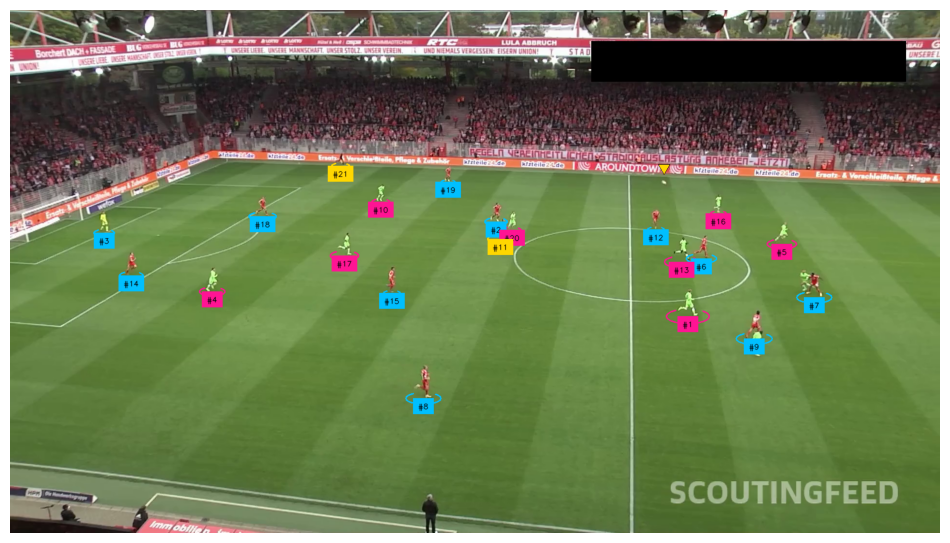

In [28]:
# Import the supervision library for computer vision tasks
import supervision as sv

# Define the path to the source video file
SOURCE_VIDEO_PATH = "/content/121364_0.mp4"
# Define class IDs for different objects
BALL_ID = 0
GOALKEEPER_ID = 1
PLAYER_ID = 2
REFEREE_ID = 3

# Initialize an EllipseAnnotator for drawing ellipses around players, goalkeepers, and referees
ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
# Initialize a LabelAnnotator for adding tracker IDs and team IDs to objects
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000'),
    text_position=sv.Position.BOTTOM_CENTER
)
# Initialize a TriangleAnnotator for drawing triangles (e.g., for the ball)
triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex('#FFD700'),
    base=25,
    height=21,
    outline_thickness=1
)

# Initialize a ByteTrack tracker for object tracking
tracker = sv.ByteTrack()
# Reset the tracker's state
tracker.reset()

# Create a frame generator to extract frames from the video
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
# Get the first frame for processing
frame = next(frame_generator)

# Perform inference using the PLAYER_DETECTION_MODEL with a confidence threshold
result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
# Convert inference results to Supervision Detections format
detections = sv.Detections.from_inference(result)

# Filter detections to get only the ball
ball_detections = detections[detections.class_id == BALL_ID]
# Pad the bounding boxes of the ball detections by 10 pixels
ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

# Filter detections to get all objects *except* the ball
all_detections = detections[detections.class_id != BALL_ID]
# Apply Non-Maximum Suppression (NMS) to remove overlapping bounding boxes
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
# Update the tracker with the processed detections
all_detections = tracker.update_with_detections(detections=all_detections)

# Separate detections into goalkeepers, players, and referees based on their original class IDs
goalkeepers_detections = all_detections[all_detections.class_id == GOALKEEPER_ID]
players_detections = all_detections[all_detections.class_id == PLAYER_ID]
referees_detections = all_detections[all_detections.class_id == REFEREE_ID]

# Crop images for detected players to feed into the team classifier
players_crops = [sv.crop_image(frame, xyxy) for xyxy in players_detections.xyxy]
# Predict the team ID for each player using the pre-trained team_classifier
players_detections.class_id = team_classifier.predict(players_crops)

# Resolve the team ID for goalkeepers based on proximity to player centroids
goalkeepers_detections.class_id = resolve_goalkeepers_team_id(
    players_detections, goalkeepers_detections)

# Adjust the class ID for referees (e.g., to avoid conflicts with team IDs, or for specific annotation)
referees_detections.class_id -= 1

# Merge all processed detections (players with team IDs, goalkeepers with team IDs, and referees)
all_detections = sv.Detections.merge([
    players_detections, goalkeepers_detections, referees_detections])

# Create labels for annotation using the tracker IDs
labels = [
    f"#{tracker_id}"
    for tracker_id
    in all_detections.tracker_id
]

# Ensure class IDs are integer type for consistent handling
all_detections.class_id = all_detections.class_id.astype(int)

# Create a copy of the original frame for annotation
annotated_frame = frame.copy()
# Annotate the frame with ellipses for all tracked and classified objects
annotated_frame = ellipse_annotator.annotate(
    scene=annotated_frame,
    detections=all_detections)
# Annotate the frame with labels (tracker IDs)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame,
    detections=all_detections,
    labels=labels)
# Annotate the frame with triangles for the ball
annotated_frame = triangle_annotator.annotate(
    scene=annotated_frame,
    detections=ball_detections)

# Plot the final annotated frame
sv.plot_image(annotated_frame)